In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

尝试生成一些正弦函数数据

In [2]:
import pandas as pd
import math
import random
total_len = 1000
test_df = pd.DataFrame({"val": list(range(total_len))})
test_df["val"] = test_df["val"] / 100
test_df["val"] = test_df["val"].apply(lambda x: math.sin(x) * 100 + (random.randint(-10, 10)))
print(test_df)

           val
0    -5.000000
1    -5.000017
2    -5.000133
3    -2.000450
4     1.998933
..         ...
995 -41.140513
996 -47.003204
997 -46.860795
998 -62.713200
999 -61.560333

[1000 rows x 1 columns]


将数据进行切割

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
day_len = 15
x = np.array(test_df['val'][0:day_len])
y = np.array(test_df['val'][day_len])
for i in range(1, total_len - day_len):
    start_index = i
    end_index = i + day_len
    x = np.vstack((x, test_df['val'][start_index:end_index]))
    y = np.vstack((y, test_df['val'][end_index]))
train_x, test_x = train_test_split(x, shuffle=False)
train_y, test_y = train_test_split(y, shuffle=False)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], -1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], -1)
print(type(train_x))

<class 'numpy.ndarray'>


构建一个model

In [42]:
def create_model():
    model = keras.Sequential([
#         layers.LSTM(100, dropout=0.2, return_sequences=True),
#         layers.LSTM(100, dropout=0.2),
        layers.Dense(5, ),# activation="relu" 加上这个参数后，拟合就比较差了
        layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [40]:
model = create_model()
model.fit(train_x, train_y, epochs=100, validation_split=0.3)
result = model.predict(test_x)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 4914.3530 - val_loss: 2671.6665
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 4340.8062 - val_loss: 2367.9646
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 3839.6865 - val_loss: 2089.0823
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 3367.0166 - val_loss: 1826.5925
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 2920.6697 - val_loss: 1576.5256
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 2496.0100 - val_loss: 1333.4119
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 2095.1584 - val_loss: 1120.7621
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 1735.1429 - val_loss: 915.3303
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 1393.0123 - val_loss: 727.8262
Epoch 10/100
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 2ms/step - loss: 113.6092 - val_loss: 136.4398
Epoch 80/100
17/17 [==============================] - 0s 2ms/step - loss: 114.1034 - val_loss: 136.6317
Epoch 81/100
17/17 [==============================] - 0s 2ms/step - loss: 113.9860 - val_loss: 137.7648
Epoch 82/100
17/17 [==============================] - 0s 2ms/step - loss: 114.2235 - val_loss: 136.7803
Epoch 83/100
17/17 [==============================] - 0s 2ms/step - loss: 113.9003 - val_loss: 137.6609
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 113.8969 - val_loss: 136.9301
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 113.8048 - val_loss: 138.1081
Epoch 86/100
17/17 [==============================] - 0s 2ms/step - loss: 114.0313 - val_loss: 137.0394
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 114.0836 - val_loss: 137.2897
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 114

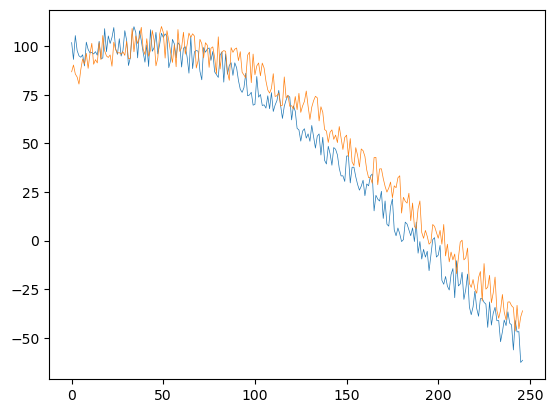

mse: 163.64522489949078


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
x = list(range(len(test_y[:, 0])))
# plot
fig, ax = plt.subplots()
ax.plot(x, test_y[:, 0], linewidth=0.5, label="actual")
ax.plot(x, result[:, 0], linewidth=0.5, label="predict")
plt.show()
print(f'mse: {mean_squared_error(test_y[:, 0], result[:, 0])}')